In [93]:
import tensorflow as tf
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Introduction 


In [4]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU')]

The current GPU is not compatible with tensorflow.

## Data loading


**Note:** the `save` command in Matlab and Octave have different behaviours. Octave generates text files by default. To generate binary files in Octave, use `save -v7 filename.mat`.

In [5]:
path = "/media/maousi/Data/tmp/simulations_2020_03_21/"

In [7]:
X = sio.loadmat(path+"X.mat")['X']
Y = sio.loadmat(path+"Y.mat")['Y']

In [8]:
X.shape

(10000, 2, 250)

In [9]:
Y.shape

(10000, 4)

In [17]:
X[:, 0, 0].shape

(10000,)

# Test data normalization

## Output normalization

In [18]:
def normalizeoutputmatDL(mat,newmins,newmaxs, parammins=None, parammaxs=None):
    shapes = mat.shape
    
    if type(parammins) == type(None) and type(parammaxs) == type(None):
        parammins = np.full(newmins.shape,0.0)
        parammaxs = np.full(newmins.shape,0.0)
        for i in range(0,shapes[1]):
            param = mat[:,i]
            parammin = param.min()
            parammax = param.max()
            parammins[i] = parammin
            parammaxs[i] = parammax
            mat[:,i] = newmins[i] + (newmaxs[i] - newmins[i]) * (param - parammin) / (parammax - parammin)
            print("Compute min and max for output parameters")

    else:
        for i in range(0,shapes[1]):
            param = mat[:,i]
            parammin = parammins[i]
            parammax = parammaxs[i]
            mat[:,i] = newmins[i] + (newmaxs[i] - newmins[i]) * (param - parammin) / (parammax - parammin)
            print("load min and max for output parameters")

    return mat, parammins, parammaxs

### Test on simple 2D tensor

In [55]:
# Do not forget to set float values !
A = np.array([
    [1,2,3,4],
    [5,6,7,8],
    [9,10,11,12]
], dtype=float)

Compare `np.full` and `np.zeros` behaviour:

In [48]:
np.zeros(A.shape[1])

array([0., 0., 0., 0.])

In [49]:
np.full(A.shape[1], 0.0)

array([0., 0., 0., 0.])

This is the same.

In [57]:
newmins = np.zeros(A.shape[1])
newmaxs = np.ones(A.shape[1])
Anorm, mins, maxs = normalizeoutputmatDL(A, newmins, newmaxs)

Compute min and max for output parameters
Compute min and max for output parameters
Compute min and max for output parameters
Compute min and max for output parameters


In [58]:
Anorm

array([[0. , 0. , 0. , 0. ],
       [0.5, 0.5, 0.5, 0.5],
       [1. , 1. , 1. , 1. ]])

In [59]:
mins

array([1., 2., 3., 4.])

In [60]:
maxs

array([ 9., 10., 11., 12.])

Recover the original matrix from the normalized one:

In [67]:
def normalizeoutputmat(mat,newmins,newmaxs):
    shapes = mat.shape
    parammins = np.full(newmins.shape,0.0)
    parammaxs = np.full(newmins.shape,0.0)
    
    for i in range(0,shapes[1]):
        param = mat[:,i]
        parammin = param.min()
        parammax = param.max()
        parammins[i] = parammin
        parammaxs[i] = parammax
        mat[:,i] = newmins[i] + (newmaxs[i] - newmins[i]) * (param - parammin) / (parammax - parammin)

    return mat, parammins, parammaxs

In [68]:
Arecovered, newmins2, newmaxs2 = normalizeoutputmat(Anorm, mins, maxs)

In [69]:
Arecovered

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.]])

In [70]:
newmins2

array([-0.125, -0.25 , -0.375, -0.5  ])

# Look at coefficient decrease

Directly observe the relevance of getting rid of many coefficients

In [89]:
np.random.choice(range(10000), 4)

array([8960, 6996, 5190, 3097])

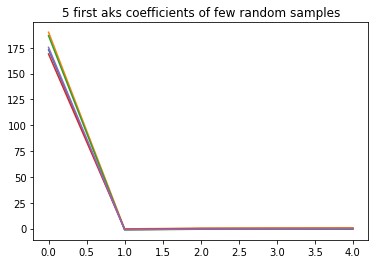

In [102]:
# Look at the first aks of few samples
Ncoeff = 5
samples = np.random.choice(range(X.shape[0]), Ncoeff)
xaxis = range(Ncoeff)
for i in samples:
    plt.plot(xaxis, X[i, 0, 0:Ncoeff])
plt.title("{} first aks coefficients of few random samples".format(Ncoeff));

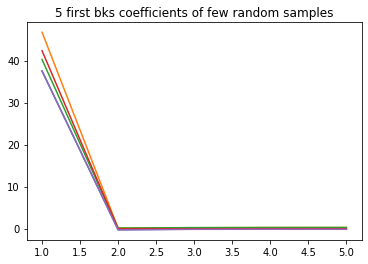

In [101]:
# Look at the first 10 bks of few samples
xaxis = range(1, Ncoeff + 1)
for i in samples:
    plt.plot(xaxis, X[i, 1, 0:Ncoeff])
plt.title("{} first bks coefficients of few random samples".format(Ncoeff));